In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Exploring the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/content/drive/MyDrive/machine_learning/Student_Performance.csv')

# Count the number of rows
row_count = len(df)

print(f'The CSV file contains {row_count} rows.')

The CSV file contains 10000 rows.


In [8]:
# Sample 2000 rows from the DataFrame
sampled_df = df.sample(n=2000, random_state=42)

# If you want to reset the index after sampling (optional)
sampled_df = sampled_df.reset_index(drop=True)
df = sampled_df
# Check the number of rows in the sampled DataFrame
print(len(df))

2000


In [9]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,5,69,No,8,2,51.0
1,2,46,Yes,4,8,20.0
2,7,56,Yes,7,5,46.0
3,6,42,Yes,8,5,28.0
4,7,53,No,4,6,41.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     2000 non-null   int64  
 1   Previous Scores                   2000 non-null   int64  
 2   Extracurricular Activities        2000 non-null   object 
 3   Sleep Hours                       2000 non-null   int64  
 4   Sample Question Papers Practiced  2000 non-null   int64  
 5   Performance Index                 2000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


In [12]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,5.031500,69.104500,6.486500,4.45050,54.878000
std,2.567256,17.340961,1.685004,2.88855,19.255402
min,1.000000,40.000000,4.000000,0.00000,11.000000
25%,3.000000,54.000000,5.000000,2.00000,40.000000
50%,5.000000,68.000000,7.000000,4.00000,55.000000
75%,7.000000,84.000000,8.000000,7.00000,70.000000
max,9.000000,99.000000,9.000000,9.00000,99.000000


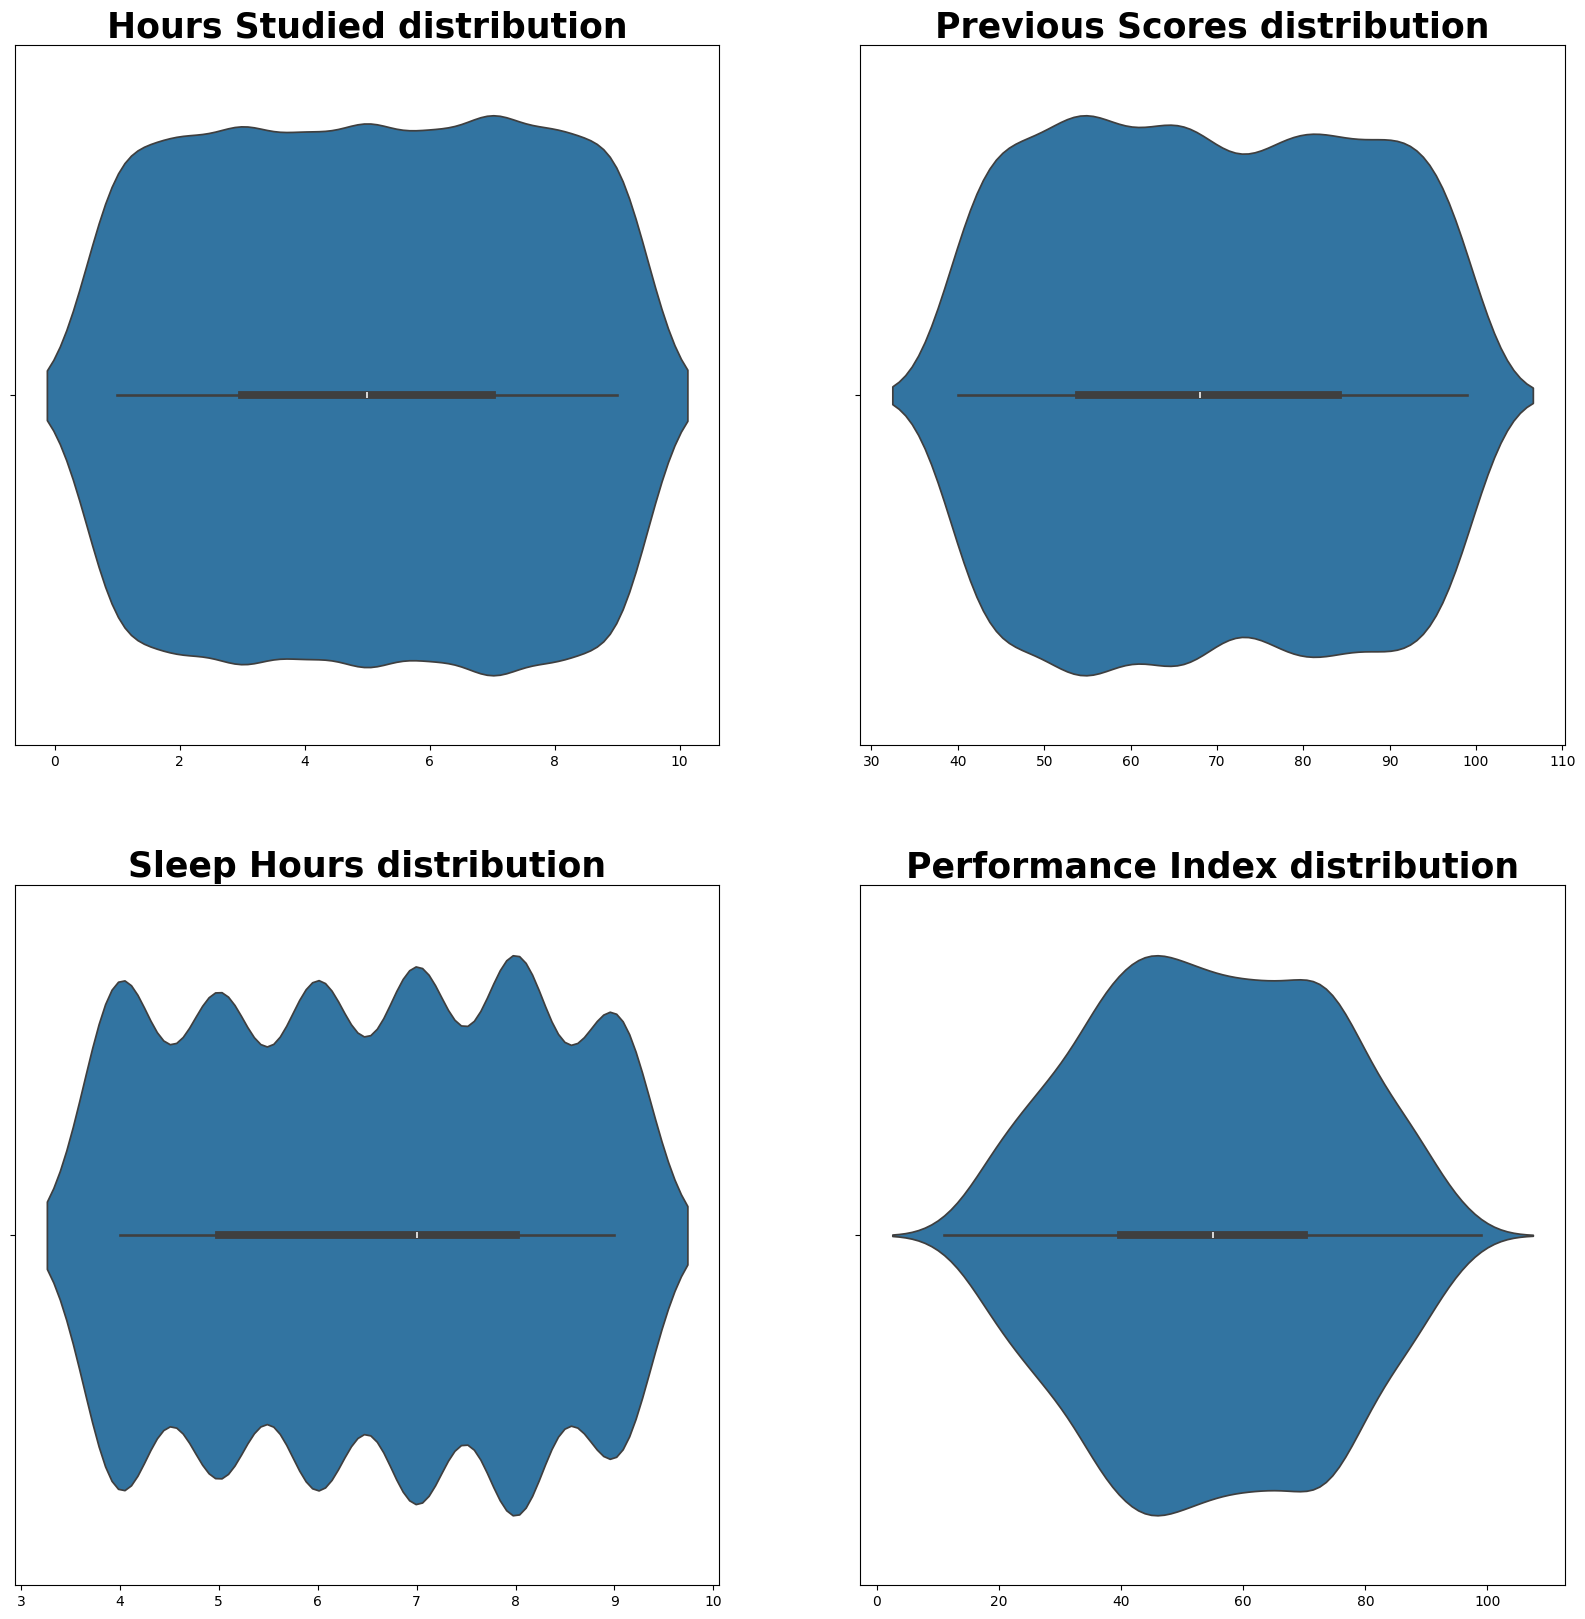

In [13]:
# Set the size of the plot
plt.figure(figsize=(20, 20))

# List of numerical columns
num_dist = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Performance Index']

# Plot violin plots for each numerical column
for i, num in enumerate(num_dist):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=df, x=num)
    plt.title(f'{num} distribution', weight='bold', fontsize=25)
    plt.xlabel('')

# Show the plots
plt.show()

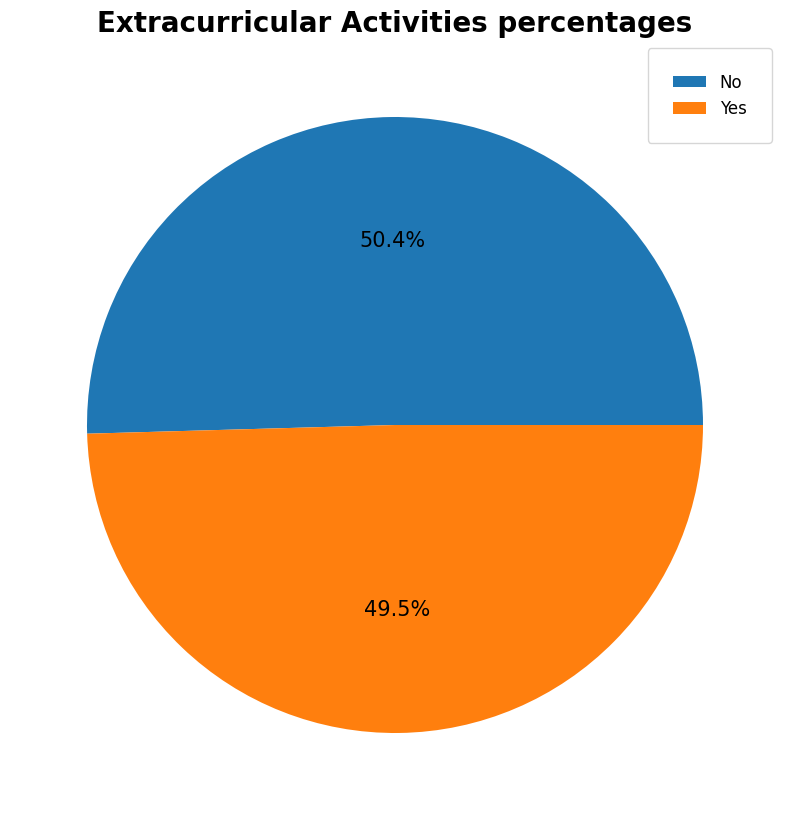

In [14]:
# Define the categorical columns to visualize
cat_dist = ['Extracurricular Activities']

# Create the pie charts
plt.figure(figsize=(10,10))

for i, cat in enumerate(cat_dist):
    plt.subplot(1,1,i+1)
    df[cat].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labeldistance=None, textprops={'fontsize': 15})
    plt.title(f'{cat} percentages', weight='bold', fontsize=20)
    plt.ylabel('')
    plt.legend(fontsize=12, borderpad=1.5)

plt.show()


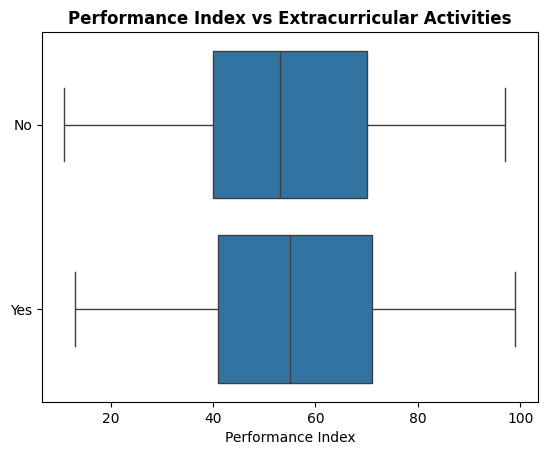

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot showing the relationship between Performance Index and Extracurricular Activities
sns.boxplot(data=df, x='Performance Index', y='Extracurricular Activities')
plt.ylabel('')
plt.title('Performance Index vs Extracurricular Activities', weight='bold')

# Show the plot
plt.show()


In [20]:

# Create a copy of the DataFrame to modify
student_performance_modif = df.copy()

# Change 'Extracurricular Activities' to numerical (1=Yes, 0=No)
student_performance_modif['Extracurricular Activities'] = student_performance_modif['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

# Optional: You can also reset the index and remove irrelevant columns, if needed
# student_performance_modif = student_performance_modif.drop(columns=['unnecessary_column'])

# Display the info of the modified DataFrame to verify
student_performance_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     2000 non-null   int64  
 1   Previous Scores                   2000 non-null   int64  
 2   Extracurricular Activities        2000 non-null   int64  
 3   Sleep Hours                       2000 non-null   int64  
 4   Sample Question Papers Practiced  2000 non-null   int64  
 5   Performance Index                 2000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 93.9 KB


Text(0.5, 1.0, "Pearson's Correlation Chart")

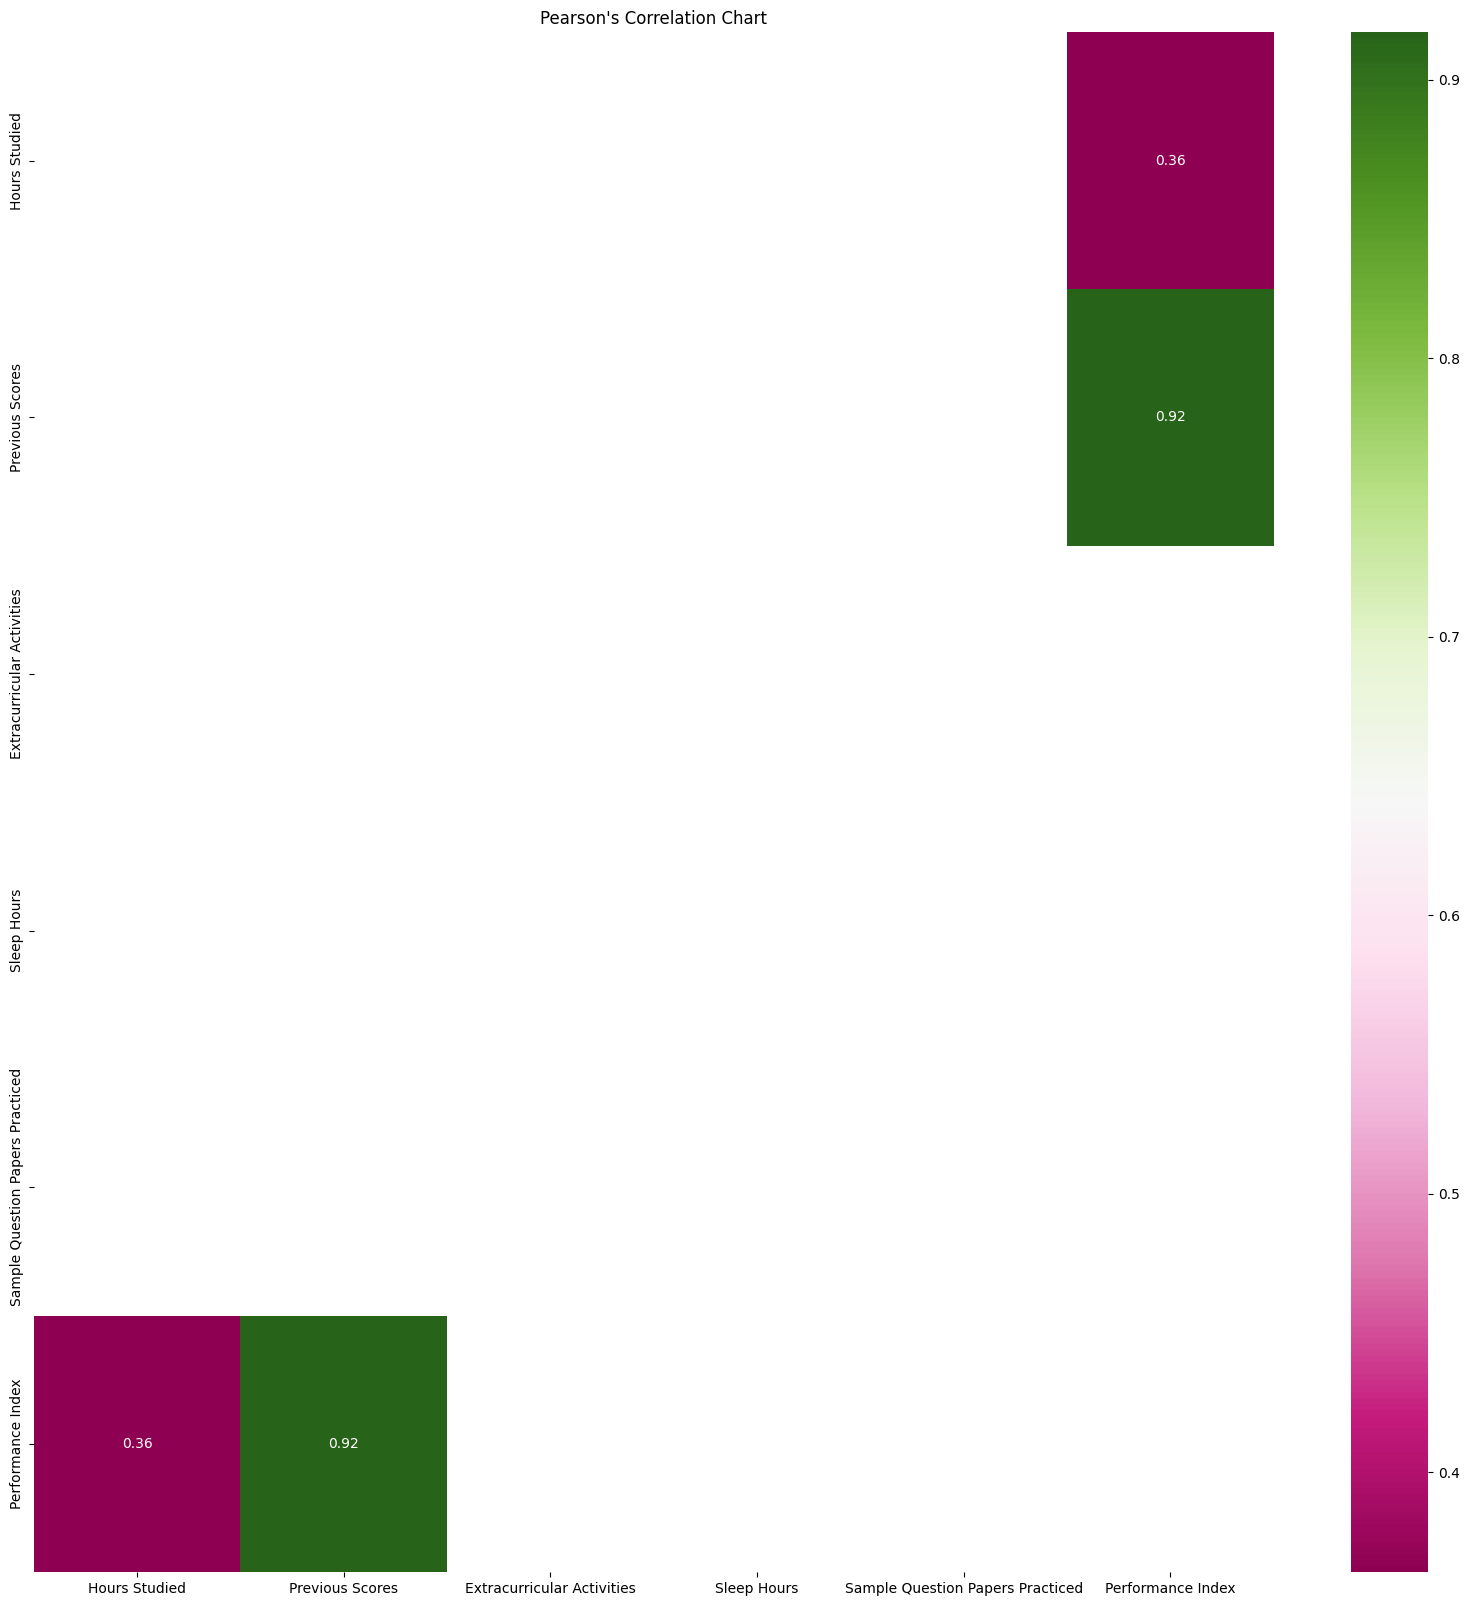

In [24]:
corr=abs(student_performance_modif.corr())
plt.figure(figsize=(20,20))
sns.heatmap(corr[(corr>0.1)&(corr<1)], cmap="PiYG", annot=True)
plt.title("Pearson's Correlation Chart")

# Dividing the Data


In [29]:

X=student_performance_modif.drop(columns='Performance Index')
y=student_performance_modif['Performance Index']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=53)

# Building the Model


In [30]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model using the training data (X_train as predictors, y_train as the target)
model.fit(X_train, y_train)

# Generate predictions on the training set
train_predictions = model.predict(X_train)

# Calculate the Root Mean Squared Error (RMSE) on the training set
# Here, mean_squared_error is used with squared=False to get RMSE instead of MSE
train_mse = mean_squared_error(y_train, train_predictions, squared=False)

# Extract the coefficients of the trained model
coefficient = model.coef_

# Calculate the R-squared (R²) value to evaluate how well the model fits the data
R2 = r2_score(y_train, train_predictions)

# Print the Root Mean Squared Error (RMSE) with precision up to 7 decimal places
print(f'Root mean squared error is {train_mse:.7}')

# Print the R-squared value with precision up to 2 decimal places
print(f'R2 is {R2:.2}')

root mean squared error is 2.039092
R2 is 0.99


In [31]:
# Assuming 'coefficient' holds the coefficients of the trained model
# Replace the index with the variable names from your dataset
coefficient_table = pd.DataFrame(data=coefficient, index=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])
coefficient_table = coefficient_table.rename(columns={0: 'coefficient'})

# Rounding coefficients for easier readability
coefficient_table = coefficient_table.round(2)

# Intercept of the model
intercept = model.intercept_

# Print the intercept of the model
print(f'Intercept of the model is {intercept}') # b

# Display the coefficient table
coefficient_table # a1, a2, a3...

Intercept of the model is -34.686795610289714


,coefficient
Hours Studied,2.86
Previous Scores,1.03
Extracurricular Activities,0.65
Sleep Hours,0.48
Sample Question Papers Practiced,0.19


# Residual Plot


Text(0, 0.5, '')

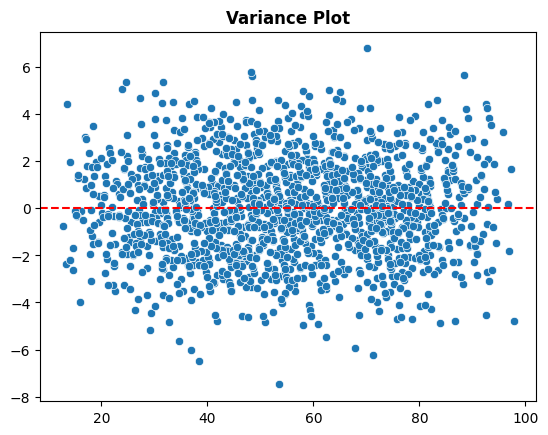

In [32]:
residuals=y_train-train_predictions
sns.scatterplot(x=train_predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot', weight='bold')
plt.ylabel('')

# Model Transformation

In [1]:
test_pred = model.predict(X_test)


R2=r2_score(y_test, test_pred)
test_rmse=mean_squared_error(y_test, test_pred, squared=False)


print(f'root mean squared error is {test_rmse:.9}')
print(f'R2 is {R2:.2}')

NameError: name 'model' is not defined